<a href="https://colab.research.google.com/github/breai/BreAI/blob/master/BreAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [0]:
!wget https://raw.githubusercontent.com/breai/BreAI/master/bidmc_01_Signals.csv

--2019-04-01 01:59:22--  https://raw.githubusercontent.com/breai/BreAI/master/bidmc_01_Signals.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2678552 (2.6M) [text/plain]
Saving to: ‘bidmc_01_Signals.csv.2’

bidmc_01_Signals.cs 100%[===================>]   2.55M  --.-KB/s    in 0.09s   

2019-04-01 01:59:22 (27.6 MB/s) - ‘bidmc_01_Signals.csv.2’ saved [2678552/2678552]



In [0]:
!wget https://raw.githubusercontent.com/breai/BreAI/master/bidmc_01_Breaths.csv

--2019-04-01 02:00:57--  https://raw.githubusercontent.com/breai/BreAI/master/bidmc_01_Breaths.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2039 (2.0K) [text/plain]
Saving to: ‘bidmc_01_Breaths.csv’

bidmc_01_Breaths.cs 100%[===================>]   1.99K  --.-KB/s    in 0s      

2019-04-01 02:00:57 (38.0 MB/s) - ‘bidmc_01_Breaths.csv’ saved [2039/2039]



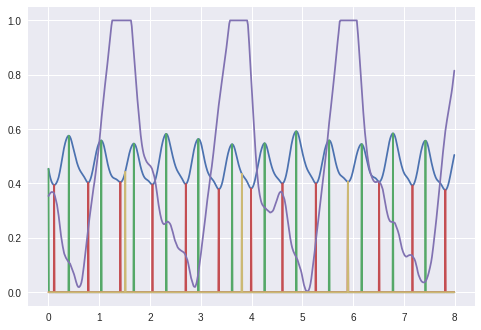

In [0]:
data = np.genfromtxt('bidmc_01_Signals.csv', delimiter=',')
data = np.delete(data, 0, 0)


time = np.transpose(data)[0]
resp = np.transpose(data)[1]
plet = np.transpose(data)[2]
plet = savgol_filter(plet, 51, 3)
maxima = np.r_[True, plet[1:] > plet[:-1]] & np.r_[plet[:-1] > plet[1:], True]
minima = np.r_[True, plet[1:] < plet[:-1]] & np.r_[plet[:-1] < plet[1:], True]
maxima = [plet[i] if v == True else 0 for i,v in enumerate(maxima)]
minima = [plet[i] if v == True else 0 for i,v in enumerate(minima)]

maxima_pairs = [ [i, v] for i, v in enumerate(maxima) if v != 0 ]
minima_pairs = [ [i, v] for i, v in enumerate(minima) if v != 0 ]

output_maxima = np.array(len(maxima))

breaths = np.genfromtxt('bidmc_01_Breaths.csv', delimiter=',')
breaths = np.delete(breaths, 0, 0)
breaths = np.transpose(breaths)[0]

breaths_for_plot = np.zeros(len(time))
for i in breaths:
    breaths_for_plot[int(i)] = plet[int(i)]


plt.plot(time[0:1000], plet[0:1000])
plt.plot(time[0:1000], maxima[0:1000])
plt.plot(time[0:1000], minima[0:1000])
plt.plot(time[0:1000], resp[0:1000])
plt.plot(time[0:1000], breaths_for_plot[0:1000])

plt.show()
